# Part 4: Choose your own adventure! (7 Points: Optional for Extra Credit)

# Dynamic Topic Modeling on State of the Union Speeches

## Imports and Data

In [48]:
import pandas as pd
import numpy as np

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer


In [49]:
sou = pd.read_csv('data/SOTU.csv')
sou.head()


,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


## Topic Model Setup
#### We fit a BERTopic model on the state of the union speeches to find reoccuring themes.

In [50]:
docs = sou['Text'].to_list()

topic_model = BERTopic(min_topic_size=3)
topics, probabilities = topic_model.fit_transform(docs)

vec_model = CountVectorizer(stop_words="english")
topic_model.update_topics(docs, vectorizer_model=vec_model)

topic_info = topic_model.get_topic_info()
topic_info.head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,54,-1_states_government_united_congress,"[states, government, united, congress, public,...",[\nTo the Congress of the United States:\nYour...
1,0,73,0_america_new_people_world,"[america, new, people, world, years, american,...","[\nMr. President, Mr. Speaker, Members of the ..."
2,1,16,1_states_government_united_congress,"[states, government, united, congress, public,...",[\nFellow-Citizens of the Senate and House of ...
3,2,13,2_government_states_united_year,"[government, states, united, year, congress, l...",[\nTo the Senate and House of Representatives:...
4,3,9,3_british_states_united_war,"[british, states, united, war, enemy, great, f...",[\nFellow-Citizens of the Senate and House of ...


## Dynamic Topic Modeling
#### We computed the time specific topic representations and visualized how they change across dates.

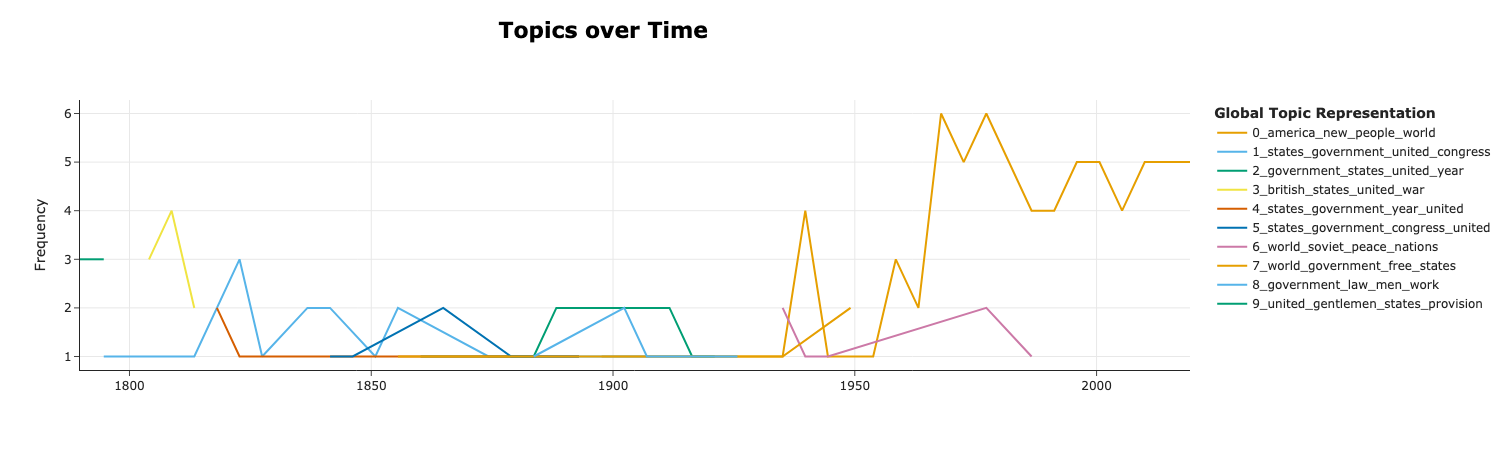

In [51]:
speeches_dates = pd.to_datetime(sou["Year"].astype("Int64").astype(str) + "-01-01", errors="coerce")

topics_over_time = topic_model.topics_over_time(
    docs,
    speeches_dates,
    nr_bins=50,
    global_tuning=True,
    evolution_tuning=True
)

fig = topic_model.visualize_topics_over_time(
    topics_over_time,
    top_n_topics=10,  # We visualize only the top 10 topics for now
    normalize_frequency=False

)
fig.show()
